In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [9]:
# Load the dataset
df = pd.read_csv("HR_Data.csv")
# Display first few rows of the dataset
print("URK22CS7048")
print("Dataset Preview:\n", df.head())

URK22CS7048
Dataset Preview:
    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.72             0.87               5                   223   
2                0.37             0.52               2                   159   
3                0.41             0.50               2                   153   
4                0.10             0.77               6                   247   

   time_spend_company  Work_accident  left  promotion_last_5years Departments  \
0                   3              0     1                      0       sales   
1                   5              0     1                      0       sales   
2                   3              0     1                      0       sales   
3                   3              0     1                      0       sales   
4                   4              0     1                      0       sales   

  

In [10]:
# Drop non-numeric columns and target variable (if available)
df_numeric = df.select_dtypes(include=[np.number])

# Check for missing values
print("URK22CS7048")
print("Missing values in each column:\n", df_numeric.isnull().sum())

# Normalize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_numeric)
print("Data Pre-processing Completed!")


URK22CS7048
Missing values in each column:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dtype: int64
Data Pre-processing Completed!


In [8]:
# Remove target variable if it exists
if 'target' in df_numeric.columns:
    df_numeric.drop(columns=['target'], inplace=True)
print("URK22CS7048")
print("Dataset after removing target variable:\n", df_numeric.head())

URK22CS7048
Dataset after removing target variable:
    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.72             0.87               5                   223   
2                0.37             0.52               2                   159   
3                0.41             0.50               2                   153   
4                0.10             0.77               6                   247   

   time_spend_company  Work_accident  left  promotion_last_5years  
0                   3              0     1                      0  
1                   5              0     1                      0  
2                   3              0     1                      0  
3                   3              0     1                      0  
4                   4              0     1                      0  


URK22CS7048


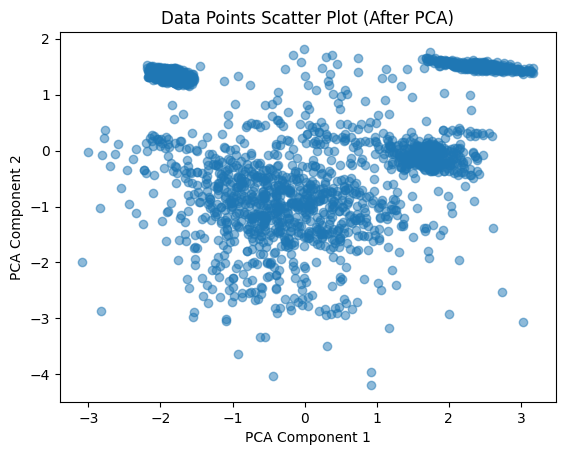

In [11]:
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Scatter plot of the dataset
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5)
print("URK22CS7048")
plt.title("Data Points Scatter Plot (After PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [12]:
def fuzzy_c_means_clustering(data, n_clusters):
    cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
        data.T, n_clusters, 2, error=0.005, maxiter=1000, init=None
    )
    cluster_labels = np.argmax(u, axis=0)
    return cntr, cluster_labels, fpc

# Example: Applying Fuzzy C-Means with 3 clusters
n_clusters = 3
cntr, cluster_labels, fpc = fuzzy_c_means_clustering(data_pca, n_clusters)
print("URK22CS7048")
print("Cluster Centers:\n", cntr)
print("Partition Coefficient:", fpc)

URK22CS7048
Cluster Centers:
 [[-1.79346369  1.18582989]
 [-0.29869678 -1.15050983]
 [ 1.93333462  0.57046389]]
Partition Coefficient: 0.7605624559862154


URK22CS7048


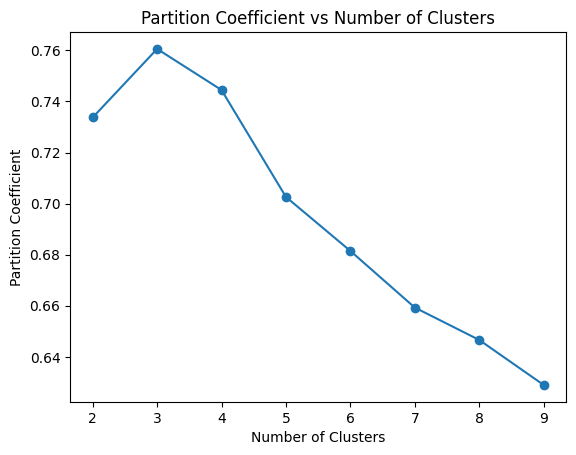

Optimal Number of Clusters: 3


In [14]:
# Finding the best number of clusters using partition coefficient
fpcs = []
n_clusters_range = range(2, 10)

for n in n_clusters_range:
    _, _, fpc = fuzzy_c_means_clustering(data_pca, n)
    fpcs.append(fpc)

# Plot Partition Coefficient to determine optimal clusters
print("URK22CS7048")
plt.plot(n_clusters_range, fpcs, marker="o")
plt.title("Partition Coefficient vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Partition Coefficient")
plt.show()

# Optimal number of clusters (choosing the one with highest FPC)
optimal_clusters = n_clusters_range[np.argmax(fpcs)]
print(f"Optimal Number of Clusters: {optimal_clusters}")

URK22CS7048


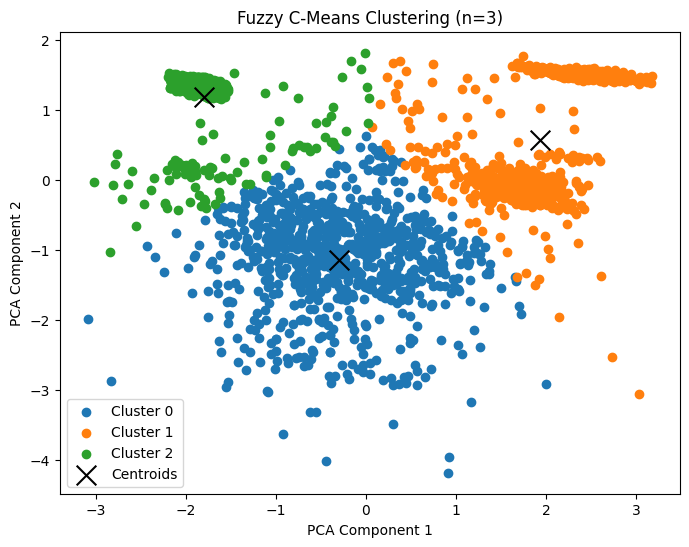

In [15]:
# Perform clustering using the optimal number of clusters
cntr, cluster_labels, _ = fuzzy_c_means_clustering(data_pca, optimal_clusters)

# Scatter plot with cluster labels
plt.figure(figsize=(8, 6))
for i in range(optimal_clusters):
    plt.scatter(data_pca[cluster_labels == i, 0], data_pca[cluster_labels == i, 1], label=f"Cluster {i}")
print("URK22CS7048")
plt.scatter(cntr[:, 0], cntr[:, 1], marker="x", s=200, color="black", label="Centroids")
plt.title(f"Fuzzy C-Means Clustering (n={optimal_clusters})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

URK22CS7048


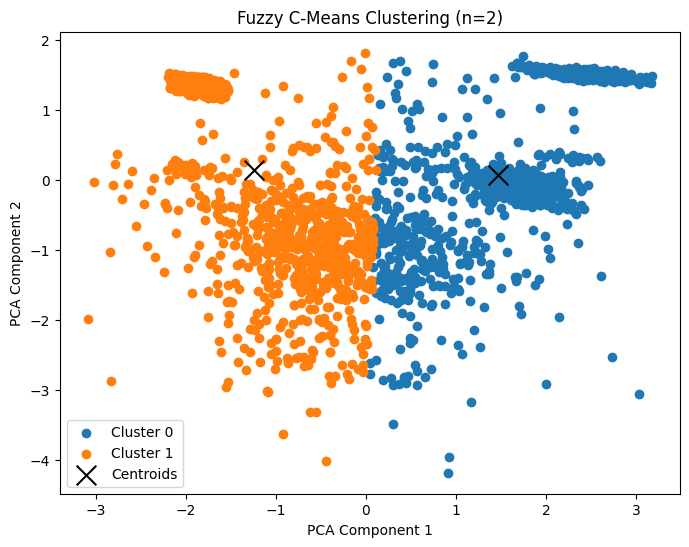

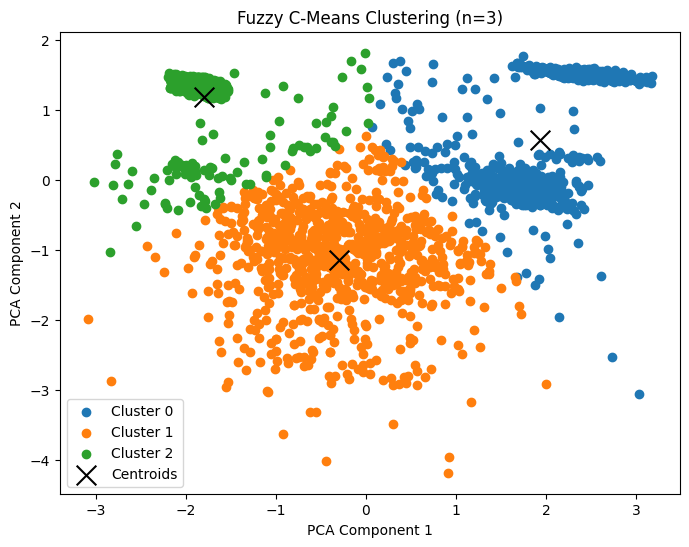

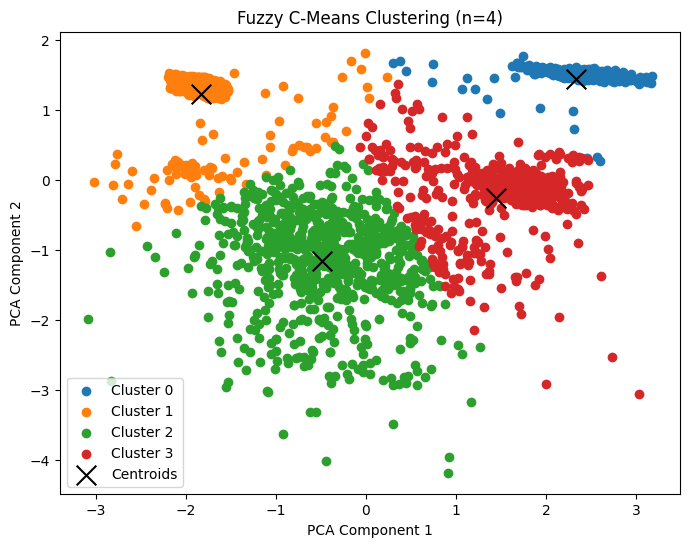

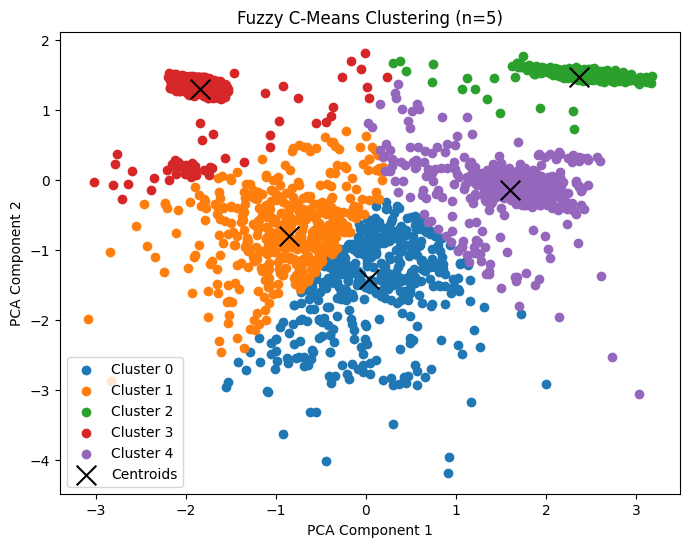

In [18]:
print("URK22CS7048")
for n in range(2, 6):  # Trying cluster numbers from 2 to 5
    cntr, cluster_labels, _ = fuzzy_c_means_clustering(data_pca, n)
    
    plt.figure(figsize=(8, 6))
    for i in range(n):
        plt.scatter(data_pca[cluster_labels == i, 0], data_pca[cluster_labels == i, 1], label=f"Cluster {i}")

    plt.scatter(cntr[:, 0], cntr[:, 1], marker="x", s=200, color="black", label="Centroids")
    plt.title(f"Fuzzy C-Means Clustering (n={n})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.show()


In [19]:
# Compute classification entropy
def classification_entropy(u):
    entropy = -np.sum(u * np.log2(u + 1e-10)) / u.shape[1]
    return entropy

# Compute Fuzzy C-Means for optimal clusters
_, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    data_pca.T, optimal_clusters, 2, error=0.005, maxiter=1000, init=None
)

entropy = classification_entropy(u)
print("URK22CS7048")
print(f"Partition Coefficient: {fpc}")
print(f"Classification Entropy: {entropy}")


URK22CS7048
Partition Coefficient: 0.7605473502800054
Classification Entropy: 0.6436772684674386


In [22]:
# Save clustering results to CSV for Tableau visualization
df_numeric["Cluster"] = cluster_labels
df_numeric.to_csv("Fuzzy_CMeans_Results.csv", index=False)
print("URK22CS7048")
print("Cluster results saved for Tableau visualization.")


URK22CS7048
Cluster results saved for Tableau visualization.
